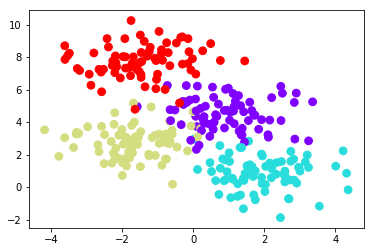

In [2]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
X,y = make_blobs(n_samples=300,centers=4,random_state=0,cluster_std=1.0)
plt.scatter(X[:,0],X[:,1],c=y,s=60,cmap='rainbow')
plt.show()

In [3]:

import numpy as np
def visualize_classifier(model,X,y,ax=None,cmap='rainbow'):
    ax=plt.gca()
    #画出训练数据
    ax.scatter(X[:,0],X[:,1],c=y,s=30,cmap=cmap,clim=(y.min(),y.max()),zorder=3)
    ax.axis('tight')
    ax.axis('off')
    ylim=ax.get_xlim()
    xlim=ax.get_ylim()
    #用评估期拟合模型
    model.fit(X,y)
    xx,yy = np.meshgrid(np.linspace(*xlim,num=200),np.linspace(*ylim,num=200))
    print(xx.shape)
    print(yy.shape)
    Z=model.predict(np.c_[xx.ravel(),yy.ravel()]).reshape(xx.shape)
    print(Z.shape)
    #为结果生成彩图
    n_classes=len(np.unique(y))
    print(y.min())
    print(y.max())
    contours=ax.contourf(xx,yy,Z,alpha=0.5,levels=np.arange(n_classes+1)-0.1,cmap=cmap,clim=(y.min(),y.max()),zorder=1)
    ax.set(xlim=xlim,ylim=ylim)

(200, 200)
(200, 200)
(200, 200)
0
3


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'clim'
  s)


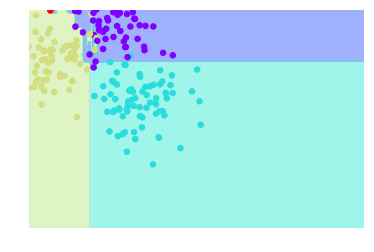

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
tree=DecisionTreeClassifier()
bag=BaggingClassifier(tree,n_estimators=100,max_samples=0.8,random_state=1)
visualize_classifier(bag,X,y)
